In [18]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.colors as colors


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = truncate_colormap(plt.get_cmap('inferno'), 0.1, 0.9)

import seaborn as sns

from scipy.spatial import distance_matrix

plt.rcParams['figure.figsize'] = (10,10)

## Figure 1E

Figure 1E shows an example Cech-codensity bifiltration on a point cloud. We do not compute the underlying MPH landscape for this bifiltration -- we only show it for illustrative purposes.

The point cloud consists of randomly generated point clusters on a set of predefined centerpoints. We give here the code for generating these clusters and plotting the resulting figure. Note that the figures produced by running this code will be slightly different from Figure 1E in the paper.

In [2]:
# randomly sample points about a given center

def generate_cluster(xcenter, ycenter, lam, variance):
    
    num_points = np.random.poisson(lam)
    
    x = np.random.normal(xcenter, variance, num_points).astype('int')
    y = np.random.normal(ycenter, variance, num_points).astype('int')
    
    return list(zip(*np.array(list(set(zip(x, y))))))

In [10]:
xs = []
ys = []

# predefined cluster centers
for x, y, z, v in [[-40, -50, 7, 4],
                  [ 35, -30, 6, 5],
                  [-45,  45, 6, 5],
                  [0, 50, 8, 4],
                  [-5, -45, 6, 5],
                  [-50,  0, 6, 4],
                  [35, 25,  7, 5]]:

    a, b = generate_cluster(x, y, z, v)
    xs += a
    ys += b
    
# Predefined central points
xs += [-1, 10, -5, -13]
ys += [13, 5, -15, 10]

In [11]:
# Code from https://github.com/MultiparameterTDAHistology/SpatialPatterningOfImmuneCells
# Computes codensity values of every point

def normalise_filter(filter_values, alpha):
    filter_values = filter_values - np.percentile(filter_values, alpha / 200)
    filter_values = filter_values / np.percentile(filter_values, 100 - alpha / 200)
    return filter_values

X = np.array([xs, ys]).T

kNN = 10
D = distance_matrix(X, X)
sortedD = np.sort(D)
codensity = np.sum(sortedD[:, : kNN + 1], axis=1)
codensity =  normalise_filter(codensity, 5)

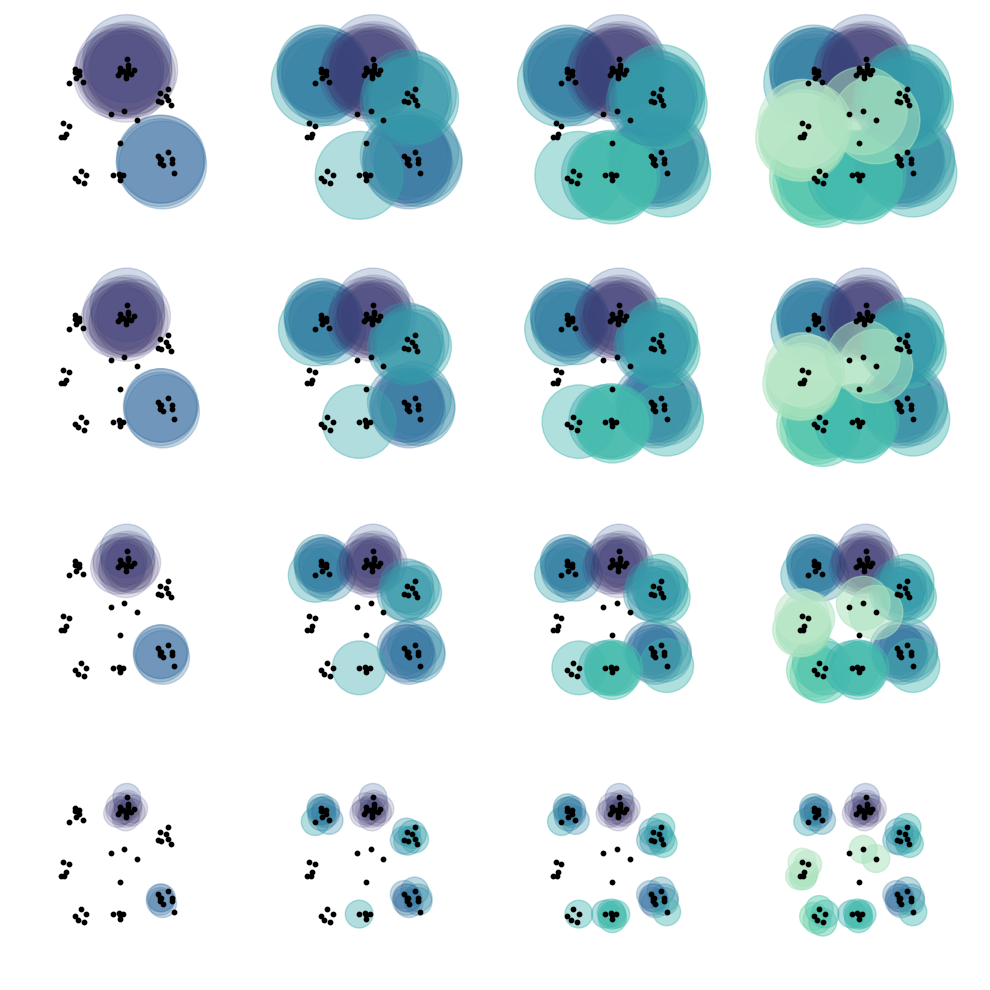

In [12]:
#Plot parameters

spotsize = 10

codensities = [0.33, 0.56, 0.65, 0.9]
scales = [400, 1500, 2800, 4000]

# Generate Figure 1E

for i, c in enumerate(codensities):
    for j, s in enumerate(scales):
        
        plt.subplot(4, 4, 1+ i + 4 * (3-j))


        fx, fy, fc = list(zip(*filter(lambda p: p[2] <= c, zip(xs, ys, codensity))))

        plt.scatter(fx, fy, c=fc, s=s, alpha=[(x/1.5 +0.15)*0.75 for x in fc], vmin=-0.25, vmax=0.95, cmap='mako')

        plt.scatter(xs, ys, c='black', s=spotsize)


        plt.xlim([-100, 100])
        plt.ylim([-100, 100])
        plt.axis('off')
        
        plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.tight_layout()

plt.show()

## Figure 1F

Figure 1F shows example pointcloud-landscape pairs for illustrative purposes. MPH landscapes were computed using the code in https://github.com/MultiparameterTDAHistology/SpatialPatterningOfImmuneCells and we do not include that computation here. Parameters used were kNN=5 and RipsMax = 100, with bounds set to 
\[\[1,RipsMax\], \[1,RipsMax\]\]

Here we simply show how the plots are generated.

In [30]:
plt.rcParams['figure.figsize'] = (5,5)

def plot_pointcloud(xs, ys, **params):
    
    plt.scatter(xs, ys, s=5, marker='s', c='#390578', **params)
    
    ax = plt.gca()

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    plt.xticks([])
    plt.yticks([])
    
    scalebar = AnchoredSizeBar(ax.transData,
                              20, '10μm', 'lower left', # 100μm
                              pad=0.1,
                              color='black',
                              size_vertical=2,
                              frameon=False,
                              sep=5,
                              fontproperties=fm.FontProperties(size=32))
    
    ax.add_artist(scalebar)
    
    plt.xlim([-75,75])
    plt.ylim([-75,75])
    
    ax.axis('off')
    
def plot_landscape(multi_landscape, k=1, rmax=100, vmax=None, ylabel='Scale', fontsize=20):

    fig, ax = plt.subplots()
    
    img = ax.imshow(np.rot90(multi_landscape[k-1].T), cmap=cmap, interpolation='None', vmax=vmax)

    ax = plt.gca()
    
    plt.xlabel('Codensity', fontsize=fontsize, labelpad=10)
    plt.ylabel(ylabel, fontsize=fontsize, labelpad=10)

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.ylim([0, rmax-1])
    plt.xlim([0, rmax-1])

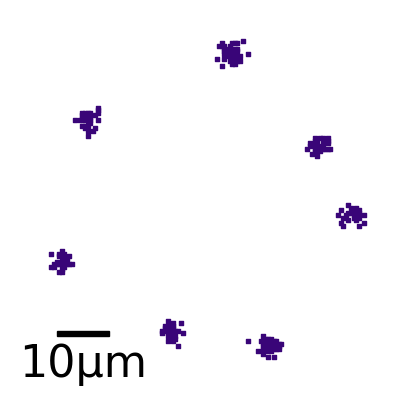

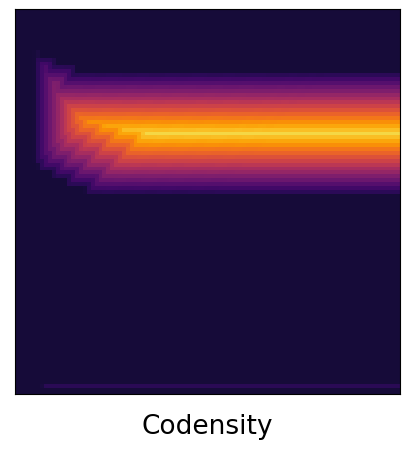

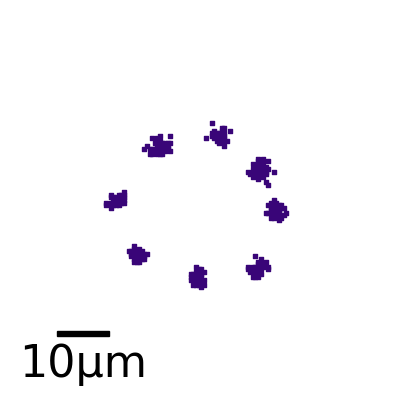

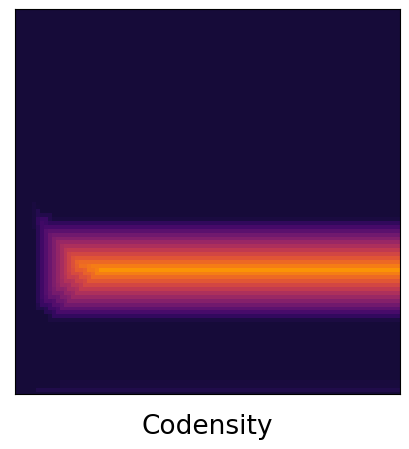

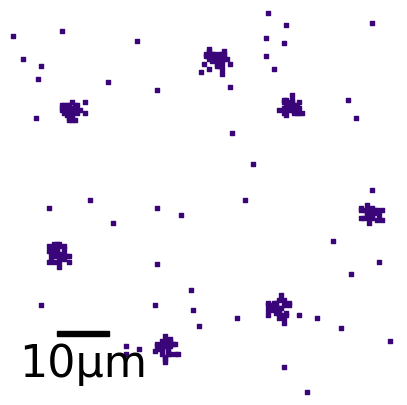

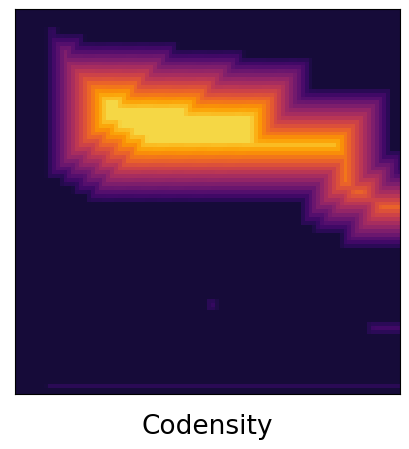

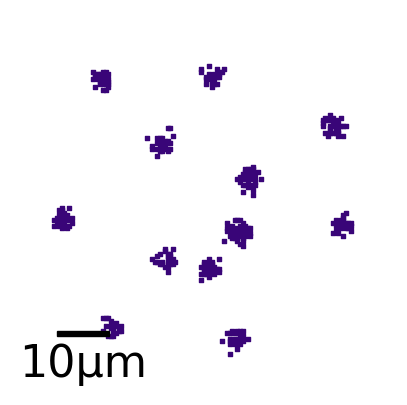

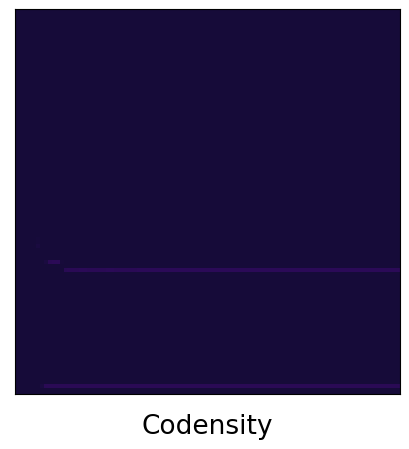

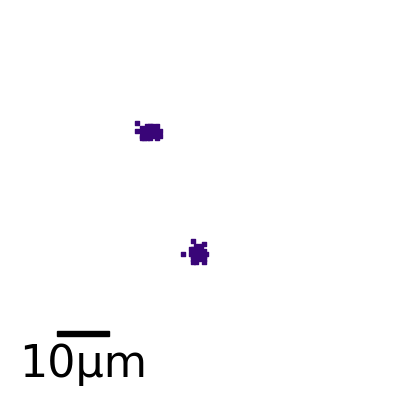

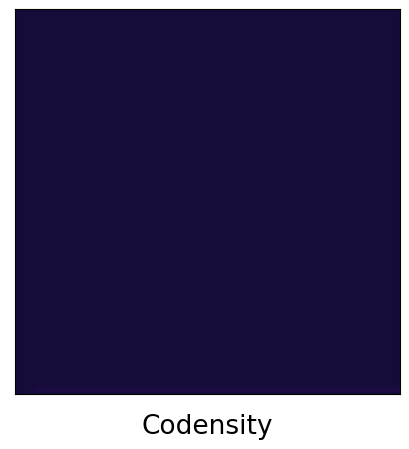

In [31]:
for x in ['big', 'small', 'noise', 'inf', 'noloop']:
    
    X = np.loadtxt(f'./{x}pc.txt')
    ls = np.load(f'./{x}ls.npy')
    
    plot_pointcloud(X[:,0], X[:,1])
    plt.show()
    
    plot_landscape(ls, k=1, vmax=16, fontsize=19, ylabel="")
    
    plt.show()